In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales (1).csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
df.shape

(16598, 11)

In [3]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#Year dan Publisher mengandung missing value sehingga missing value tersebut harus dihilangkan terlebih dahulu

In [5]:
df = df.dropna(how='any', subset=['Year', 'Publisher'])

In [6]:
df.shape

(16291, 11)

In [7]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#Melakukan visualisasi untuk mengetahui top 5 best seller video games

In [27]:
import plotly.express as px
globalsalesdata = df.groupby('Name', as_index=False).agg({"Global_Sales":"mean"})

ord_global_sales = globalsalesdata.sort_values(by='Global_Sales', ascending=False)
ord_global_sales = ord_global_sales[:5]
fig = px.bar(ord_global_sales, x='Name', y='Global_Sales',
             labels={'Global_Sales':'Global Sales', 'Name' : 'Name of Game'})
fig.update_traces(marker_color='rgb(255,193,193)', marker_line_color='rgb(255,102,102)',
                  marker_line_width=1.2, opacity=0.8)

fig.update_layout(title={'text': "Top 5 Best Seller Video Games", 'y': 0.95, 'x':0.5, 'xanchor': 'center', 'yanchor' : 'top'})
fig.show()

#Melakukan visualisasi untuk mengetahui banyaknya video games yang diterbitkan pada setiap tahunnya.

In [28]:
import plotly.express as px
yeardata = df.groupby('Year', as_index=False).agg({"Name":"count"})

fig = px.bar(yeardata, x='Year', y='Name',
             hover_data=['Name'], color='Name',
             labels={'Name':'Frekuensi', 'Year' : 'Year'})

fig.update_layout(title={'text': "Terbitan Video Games pada Setiap Tahun", 'y': 0.95, 'x':0.5, 'xanchor': 'center', 'yanchor' : 'top'})
fig.show()

#Melakukan visualisasi untuk mengetahui Top 10 Publisher dengan penjualan tertinggi.

Text(0, 0.5, 'Publisher')

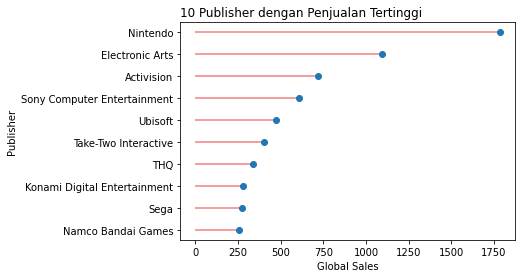

In [31]:
import plotly.graph_objects as go
sales_publisher = df.groupby('Publisher', as_index=False).agg({"Global_Sales":"sum"})
ord_sales_publisher = sales_publisher.sort_values(by='Global_Sales', ascending=False)

ord_sales_publisher = ord_sales_publisher[:10]
ord_sales_publisher = ord_sales_publisher.sort_values(by='Global_Sales', ascending=True)
my_range=range(1,len(ord_sales_publisher.index)+1)
import seaborn as sns

plt.hlines(y=my_range, xmin=0, xmax=ord_sales_publisher['Global_Sales'], color='lightcoral')
plt.plot(ord_sales_publisher['Global_Sales'], my_range, "o")
# Add titles and axis names
plt.yticks(my_range, ord_sales_publisher['Publisher'])
plt.title("10 Publisher dengan Penjualan Tertinggi ", loc='left')
plt.xlabel('Global Sales')
plt.ylabel('Publisher')

#Melakukan visualisasi untuk mengetahui persentase penjualan.

In [32]:
import plotly.graph_objects as go

#ambil data (rata2)
dfGlobal = df.sort_values(by="Global_Sales", ascending=False)
dfGlobal = dfGlobal[:5].mean()

labels = ['North America Sales', 'Europe Sales', 'Japan Sales', 'Other Sales']
values = dfGlobal[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(title={'text': "Percentage of Sales", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor' : 'top'})
fig.show()

#Mengelompokkan data berdasarkan Genre dan menampilkan rata-rata dari setiap penjualan berdasarkan Genre tanpa melibatkan Global Series.

In [22]:
import warnings
warnings.filterwarnings('ignore')
df_group = df.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].mean()
df_group

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


#Melakukan visualisasi dengan Barplot

In [23]:
for i,j in enumerate(df_group.columns):
    print(i,j)

0 NA_Sales
1 EU_Sales
2 JP_Sales
3 Other_Sales


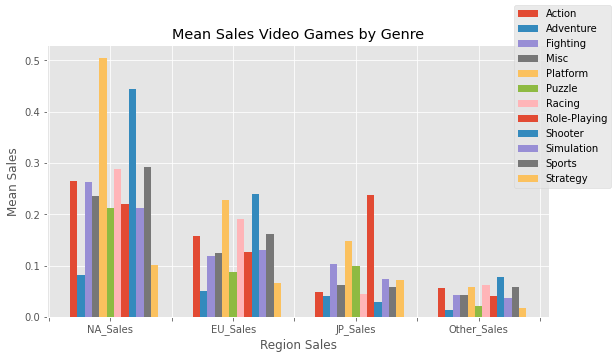

In [24]:
plt.style.use('ggplot')
x = np.arange(0, 20, 5)
fig, ax = plt.subplots(figsize=(9,5))
wid = 0.3

i, j = 0, 1
while i < len(df_group.index) :
    ax.bar(x+j, df_group.iloc[i], width=wid, label=df_group.index[i])
    i +=1
    j +=0.3
    
ax.set_xticklabels([ '', '', 'NA_Sales', '', 'EU_Sales', '', 'JP_Sales',  '', 'Other_Sales'])
ax.set_title('Mean Sales Video Games by Genre')
ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')
fig.legend()
plt.show()